# Wine Quality
DataSet scaricati da [UCI](https://archive.ics.uci.edu/dataset/186/wine+quality)

*Lavoro di Cartanese Alessandro e Rota Gabriele*

In [121]:
#importo le librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Caricamento e unione dei DataSet

In [122]:
# Caricamento dei dati
red = pd.read_csv('wine+quality/winequality-red.csv', sep=';')
white = pd.read_csv('wine+quality/winequality-white.csv', sep=';')

red['type'] = 0   # 0 per rosso
white['type'] = 1 # 1 per bianco

In [123]:
# Unione i due dataset
df = pd.concat([red, white], ignore_index=True)

print("Dataset caricato. Dimensioni:", df.shape)

Dataset caricato. Dimensioni: (6497, 13)


### Informazioni e pulizia dei dati

In [124]:
# Informazioni sui dati
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [125]:
# Controllo che non ci siano valori nulli
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [126]:
# Stampo la testa del dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [127]:
# Descrizione dei dati
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## BoxPlot

In [128]:
# Definiamo la palette colori
palette = ["#7A3E48", "#B68B8A", "#CBB199", "#D9B26E", "#E8D5A9"]

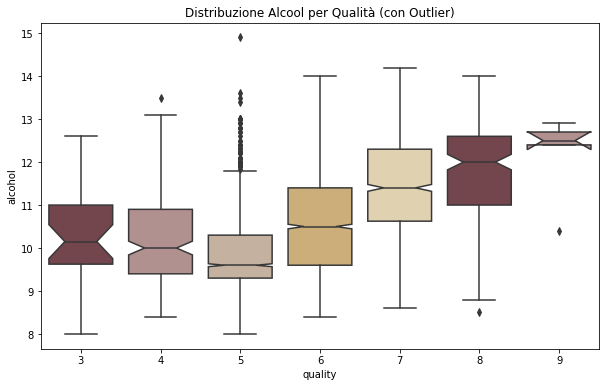

In [129]:
# Box Plot 
plt.figure(figsize=(10, 6))

sns.boxplot(x='quality', y='alcohol', data=df, notch=True, palette = palette)
plt.title("Distribuzione Alcool per Qualità (con Outlier)")
plt.show()

## Small Multiples

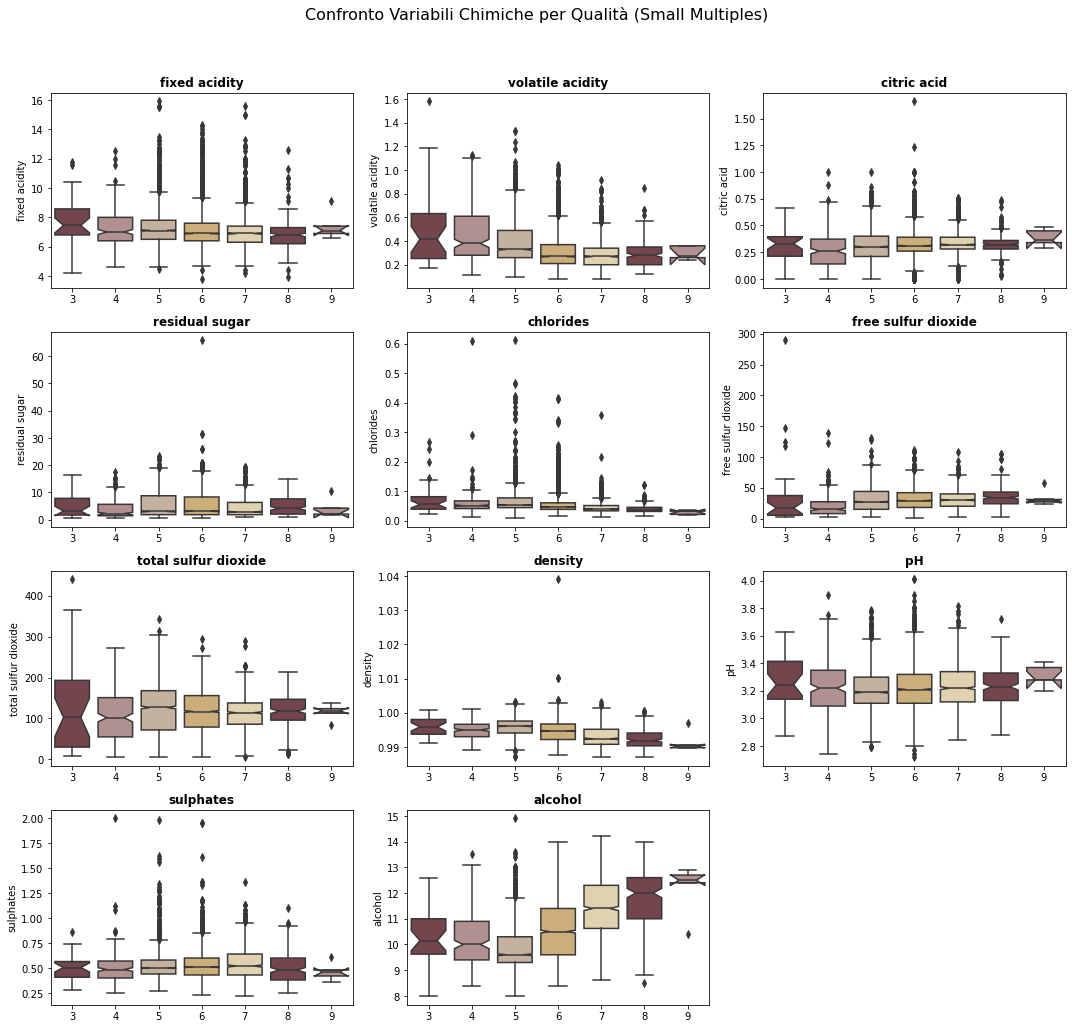

In [130]:
# Selezioniamo tutte le colonne tranne 'quality' e 'type'
variables = df.columns.drop(['quality', 'type'])

# Impostiamo una griglia 4x3 (abbiamo 11 variabili, quindi 12 spazi sono sufficienti)
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Confronto Variabili Chimiche per Qualità (Small Multiples)', fontsize=16)

# Ciclo per creare un box plot per ogni variabile
for i, col in enumerate(variables):
    if i < len(variables):
        ax = axes.flatten()[i]
        # Palette 'coolwarm' per distinguere visivamente la scala di qualità
        sns.boxplot(x='quality', y=col, data=df, ax=ax, notch=True, palette = palette
)
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('') # Rimuoviamo etichette ridondanti per migliorare il Data-Ink Ratio 

# Rimuoviamo l'ultimo grafico vuoto (il 12esimo) per pulizia
fig.delaxes(axes.flatten()[11])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Correlazione positiva

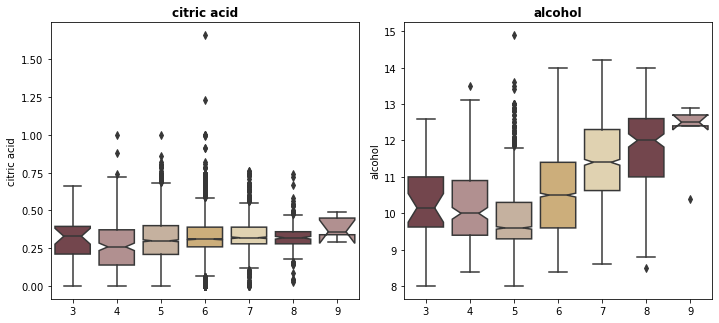

In [131]:
# Selezioniamo solo le colonne 'citric acid' e 'alcohol'
variables = df.columns.drop(['quality', 'type', 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ciclo per creare un box plot per ogni variabile
for i, col in enumerate(variables):
    if i < len(variables):
        ax = axes.flatten()[i]
        sns.boxplot(x='quality', y=col, data=df, ax=ax, notch=True, palette = palette
)
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('') # Rimuoviamo etichette ridondanti per migliorare il Data-Ink Ratio

fig.delaxes(axes.flatten()[2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Correlazione negativa

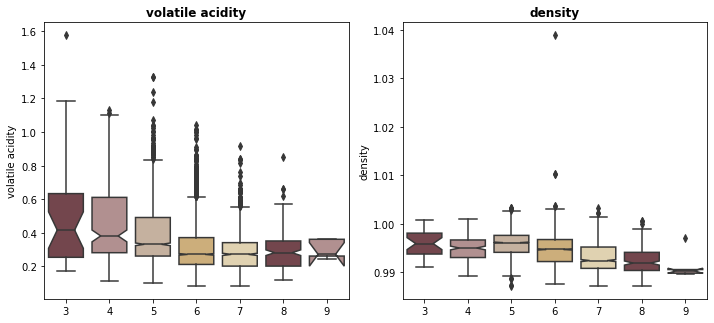

In [132]:
# Selezioniamo solo le colonne 'volatile acidity' e 'density'
variables = df.columns.drop(['quality', 'type', 'fixed acidity', 'alcohol', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid', 'pH', 'sulphates'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ciclo per creare un box plot per ogni variabile
for i, col in enumerate(variables):
    if i < len(variables):
        ax = axes.flatten()[i]
        sns.boxplot(x='quality', y=col, data=df, ax=ax, notch=True, palette = palette
)
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('') # Rimuoviamo etichette ridondanti per migliorare il Data-Ink Ratio 

fig.delaxes(axes.flatten()[2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Variabili irrilevanti

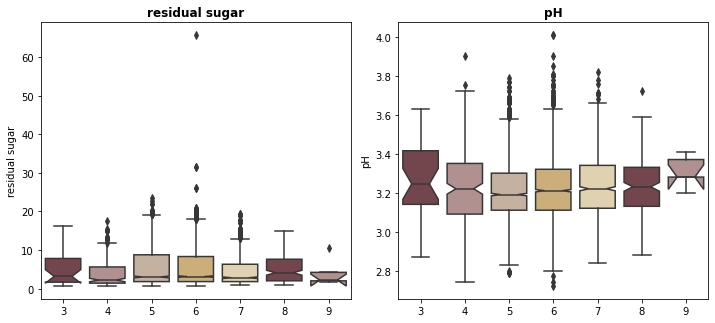

In [133]:
# Selezioniamo solo le colonne 'residual sugar' e 'pH'
variables = df.columns.drop(['quality', 'type', 'fixed acidity', 'alcohol', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid', 'density', 'sulphates'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Ciclo per creare un box plot per ogni variabile
for i, col in enumerate(variables):
    if i < len(variables):
        ax = axes.flatten()[i]
        sns.boxplot(x='quality', y=col, data=df, ax=ax, notch=True, palette = palette
)
        ax.set_title(col, fontweight='bold')
        ax.set_xlabel('') # Rimuoviamo etichette ridondanti per migliorare il Data-Ink Ratio 

fig.delaxes(axes.flatten()[2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Preprocessing

### Normalizzazione

In [134]:
# Separiamo l'input (X) dall'output (y)
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Stratificazione

In [135]:
# Dividiamo in train (75%) e test (25%) mantenendo le proporzioni delle classi
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.25, 
    stratify=y, # Questo parametro attiva la stratificazione
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4872, 12)
Test set shape: (1625, 12)


## Decision Tree

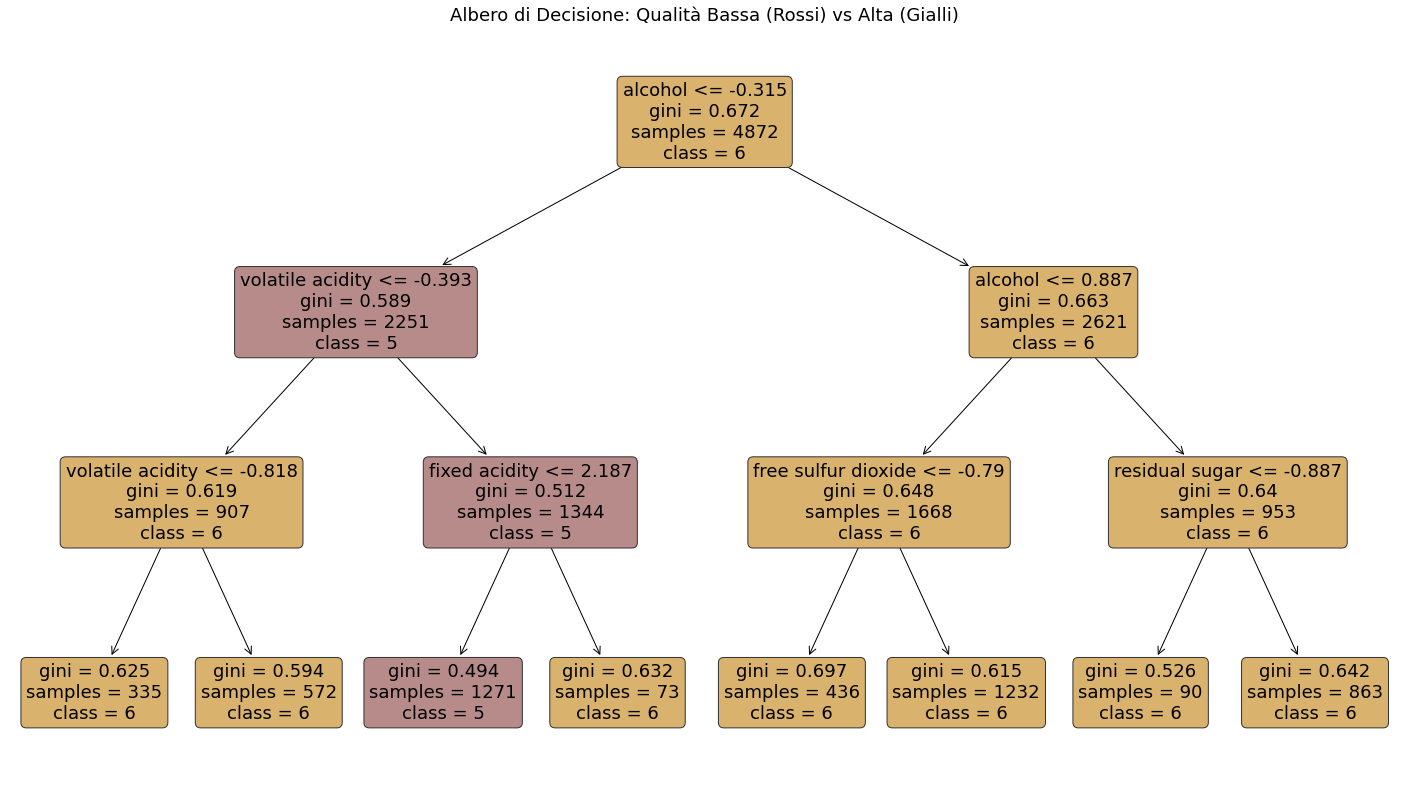

In [136]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import re

# 1. CONFIGURAZIONE COLORI
# Creiamo una mappa manuale per usare i rossi e i gialli come richiesto
# Classi 3, 4, 5 -> Sfumature di Rosso (Indicano qualità inferiore)
# Classi 6, 7, 8, 9 -> Sfumature di Giallo/Oro (Indicano qualità superiore)
custom_color_map = {
    3: palette[0], # Dark Red
    4: palette[0], # Dark Red
    5: palette[1], # Light Red (Rose)
    6: palette[3], # Dark Yellow (Gold)
    7: palette[4], # Light Yellow
    8: palette[4], # Light Yellow
    9: palette[4]  # Light Yellow
}

# 2. CREAZIONE GRAFICO 
# Aumentiamo figsize per ospitare nodi più grandi
plt.figure(figsize=(25, 14)) 

# Generiamo l'albero con fontsize aumentato per migliorare la leggibilità
tree_texts = plot_tree(dt_model, 
                       feature_names=X.columns, 
                       class_names=[str(i) for i in sorted(y.unique())], 
                       filled=True, 
                       fontsize=18,   
                       rounded=True)

#  3. PERSONALIZZAZIONE 
for text_obj in tree_texts:
    original_text = text_obj.get_text()
    
    # A. RIMOZIONE RIGA VALUE 
    new_text = re.sub(r'value = \[.*?\]\n?', '', original_text)
    text_obj.set_text(new_text)
    
    # B. CAMBIO COLORE 
    class_match = re.search(r'class = (\d+)', new_text)
    if class_match:
        pred_class = int(class_match.group(1))
        
        # Recuperiamo il box e applichiamo il colore se la classe è nella nostra mappa
        box = text_obj.get_bbox_patch()
        if box is not None:
            # Usa il colore dalla mappa, oppure grigio se la classe non fosse mappata
            new_color = custom_color_map.get(pred_class, '#dddddd')
            box.set_facecolor(new_color)
            box.set_alpha(1.0)       # Rimuove trasparenza per colori vividi
            box.set_edgecolor('#333333') # Bordo scuro per contrasto

plt.title("Albero di Decisione: Qualità Bassa (Rossi) vs Alta (Gialli)", fontsize=18)
plt.show()

## Random forest

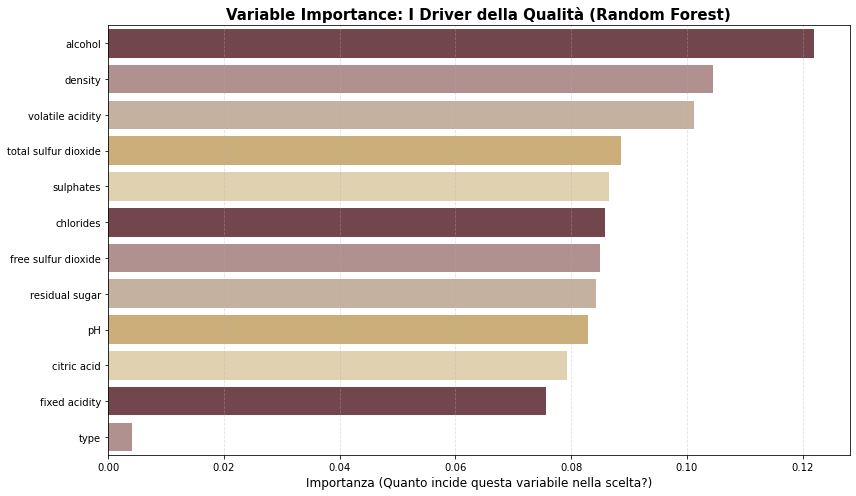

In [137]:
from sklearn.ensemble import RandomForestClassifier

# 1. Addestramento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Estrazione Importanza
importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values('Importance', ascending=False)

# 3. Visualizzazione
plt.figure(figsize=(12, 7))

bar_plot = sns.barplot(x='Importance', 
                       y='Feature', 
                       data=feature_imp_df, 
                       palette=palette, 
                       hue='Feature', 
                       dodge=False)

# Rimuoviamo la legenda manualmente se viene creata
if bar_plot.legend_:
    bar_plot.legend_.remove()

plt.title("Variable Importance: I Driver della Qualità (Random Forest)", fontsize=15, fontweight='bold')
plt.xlabel("Importanza (Quanto incide questa variabile nella scelta?)", fontsize=12)
plt.ylabel("", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Matrice di confusione

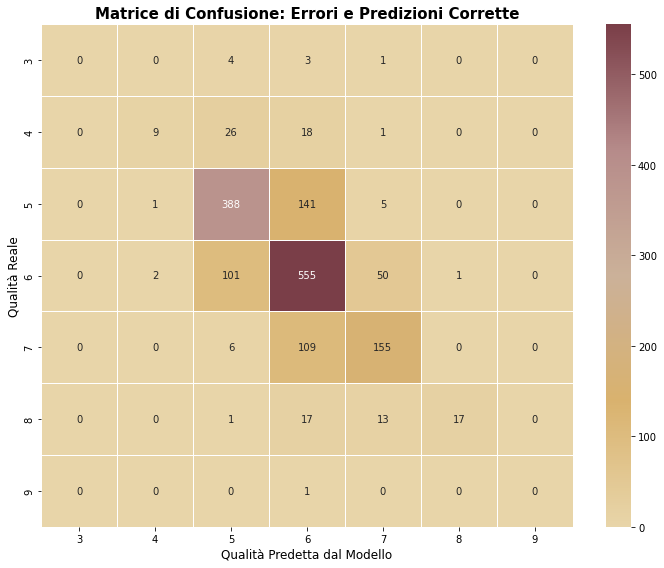

In [138]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# 1. Generiamo le predizioni
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 2. Creiamo una Mappa Colori Sfumata con la tua palette
# Ordiniamo i colori dal più chiaro al più scuro per creare un gradiente logico
# #E8D5A9 (Chiaro) -> #7A3E48 (Scuro)
custom_colors = ["#E8D5A9", "#D9B26E", "#CBB199", "#B68B8A", "#7A3E48"]
wine_cmap = LinearSegmentedColormap.from_list("wine_gradient", custom_colors)

# 3. Visualizziamo la Matrice
plt.figure(figsize=(10, 8))

# Heatmap con la nostra mappa colori personalizzata
sns.heatmap(cm, 
            annot=True, 
            fmt='d',          # Mostra numeri interi (non scientifici)
            cmap=wine_cmap,   # Usa la tua palette sfumata
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()),
            linewidths=1,     # Aggiunge bordi bianchi per pulizia
            linecolor='white')

plt.title('Matrice di Confusione: Errori e Predizioni Corrette', fontsize=15, fontweight='bold')
plt.xlabel('Qualità Predetta dal Modello', fontsize=12)
plt.ylabel('Qualità Reale', fontsize=12)

plt.tight_layout()
plt.show()

### Curva di apprendimento

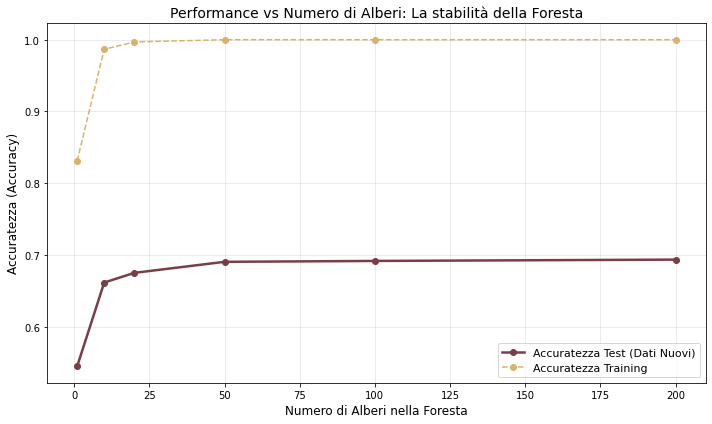

In [139]:
from sklearn.ensemble import RandomForestClassifier


# Attenzione: Questo codice potrebbe impiegare qualche secondo per girare
n_trees = [1, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

plt.figure(figsize=(10, 6))

# Linea TEST (Dati Nuovi) - Colore: Rosso Vino Scuro (palette[0])
plt.plot(n_trees, test_scores, marker='o', 
         label='Accuratezza Test (Dati Nuovi)', 
         color=palette[0],  # #7A3E48
         linewidth=2.5)     # Leggermente più spessa per risaltare

# Linea TRAIN (Addestramento) - Colore: Giallo Oro (palette[3])
plt.plot(n_trees, train_scores, marker='o', 
         label='Accuratezza Training', 
         color=palette[3],  # #D9B26E
         linestyle='--')    # Tratteggiata per distinguerla come riferimento

plt.title('Performance vs Numero di Alberi: La stabilità della Foresta', fontsize=14)
plt.xlabel('Numero di Alberi nella Foresta', fontsize=12)
plt.ylabel('Accuratezza (Accuracy)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
